In [21]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.preprocessing import StandardScaler as ss


In [22]:
def sig(x):
    x_64=x.astype(float)
    return 1/(1+np.exp(-x_64))

In [23]:
#create dataset from titanic dataset
data=pd.read_csv("train.csv")[["Survived","Pclass","Sex","Age","Fare","SibSp","Parch"]]
data=data.fillna(value={"Age":np.mean(data["Age"])})
data.loc[data.Sex=="male","Sex"]=0
data.loc[data.Sex=="female","Sex"]=1

X_train=data[["Pclass","Sex","Age","Fare","SibSp","Parch"]]
Y_train=data[["Survived"]]

In [24]:
X_train=np.array(X_train)

In [25]:
Y_train=np.array(Y_train)

In [26]:
data.head(10)

,Survived,Pclass,Sex,Age,Fare,SibSp,Parch
0,0,3,0,22.000000,7.2500,1,0
1,1,1,1,38.000000,71.2833,1,0
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,1,0
4,0,3,0,35.000000,8.0500,0,0
5,0,3,0,29.699118,8.4583,0,0
6,0,1,0,54.000000,51.8625,0,0
7,0,3,0,2.000000,21.0750,3,1
8,1,3,1,27.000000,11.1333,0,2
9,1,2,1,14.000000,30.0708,1,0


In [27]:
#normalize our data
s=ss()
X_train=s.fit_transform(X_train)

In [28]:

X=np.array(X_train)
Y=Y_train

In [48]:
def train(X,Y,*arch,lr=1,b=0.9):
    weights=[]
    start_cap_deltas=[]
    for i in range(len(arch)-1):
        weights.append(np.array([[rd.uniform(-0.5,0.5) for k in range(arch[i])] for j in range(arch[i+1])]))
        start_cap_deltas.append(np.array([[0 for k in range(arch[i])] for j in range(arch[i+1])]))
        #creating weight matrices and weights updates accumulators according to ANN architecture
    k=0
    delta_cost=1
    cost_values=[] 
    cap_deltas=[]  
    while(delta_cost>=0.0000001): 
        cap_deltas.clear()
        for i in range(len(arch)-1):
            cap_deltas.append(np.array([[0 for k in range(arch[i])] for j in range(arch[i+1])]))
        k+=1
        sum_er=0

        if k>2:
            del cost_values[0]
        for t in range(len(X)):
            #forward propagation
            a=[]
            z=[]
            for i in range(len(arch)):
                if i==0:
                    a.append(X[t].reshape(1,arch[0]))
                else:
                    z.append(np.matmul(a[i-1],weights[i-1].transpose()))
                    a.append(sig(z[i-1]))

            #backpropagation
            E_total=-Y[t]*np.log(a[len(arch)-1])-(1-Y[t])*np.log(1-a[len(arch)-1])
            sum_er+=E_total
            deltas=[]

            for i in range(len(arch)-1,0,-1): #calculating delta terms for each layer
                if i==len(arch)-1:
                    deltas.append(a[i]-Y[t])
                else:
                    deltas=[np.array(np.matmul(deltas[0],weights[i])*a[i]*(1-a[i]))]+deltas
            #deltas[0] corresponds to second delta term dletas[1] corresponds to third delta term etc, if numerating 
            #of layers started from 1

            d_weights=[]
            for i in range(len(weights)):#calculating d_weight for each weight
                d_weights.append(np.matmul(deltas[i].transpose(),a[i]))
                cap_deltas[i]=cap_deltas[i]+d_weights[i] #accumulate weights updates
        print()
        for i in range(len(weights)):#change weights according to acuumulated values
            weights[i]=weights[i]-lr/len(X)*cap_deltas[i]
        cost=1/len(X)*sum_er
        cost_values.append(*cost)
        if k>=2:
            delta_cost=cost_values[0]-cost_values[1]

        print("it number {0}, cost is {1}".format(k,cost))
    else:
        lr=lr*0.9
        print("we stopped cause cost function didn't change, lr ={0}".format(lr))
        print("delta_cost=%f" % delta_cost)
    """
    массив a=выходы с нейронов, нулевой элемент- вектор выходов с первого слоя
    массив z=входы с нейронов, нулевой эл-т- вектор входов во второй нейрон
    массив weights=матрицы весов, нулевой эл-т- матрица весов с первого слоя на второй
    массив deltas=массив ошибок на входе каждого из слоев, кроме первого. Нулевой элемент-ошибка на входе нейронов второго слоя
    массив d_weights=массив необходимых изменений матриц весов после запуска нейронной сети для одного объекта. Нулевой эл-т-
    необходимое изменение матрицы весов с первого слоя на второй
    массив cap_deltas=массив необходимых изменений матриц весов после одного пробега по всем объектам матрицы входных значений.
    Нулевой эл-т-суммарное изменение матрицы весов с первого слоя на второй

    """   
    print(weights)
    return weights,arch

In [51]:
weights,arch=train(X,Y,6,40,1)


it number 1, cost is [[0.64925997]]

it number 2, cost is [[0.63846068]]

it number 3, cost is [[0.62036582]]

it number 4, cost is [[0.62812975]]
we stopped cause cost function didn't change, lr =0.9
delta_cost=-0.007764
[array([[ 0.01561422,  0.31451536,  0.2182664 , -0.37797928, -0.44909274,
        -0.35782986],
       [ 0.19330271, -0.45193916,  0.07742919,  0.38264628, -0.27875769,
        -0.46270422],
       [-0.04369952,  0.53102153, -0.11090952, -0.15242786,  0.04696118,
        -0.49104771],
       [-0.4390238 , -0.28782839, -0.18953005, -0.35616583,  0.01807733,
         0.43881862],
       [-0.52828981,  0.4433716 , -0.45901018, -0.18819791, -0.26960586,
        -0.08555359],
       [-0.1543763 , -0.09474819, -0.15835374, -0.38934237, -0.02600365,
        -0.008548  ],
       [-0.4035926 ,  0.45228024, -0.33396346, -0.00478474,  0.38857255,
         0.07265997],
       [ 0.30343408,  0.48507746, -0.07437564, -0.43647659,  0.2660212 ,
        -0.04104129],
       [-0.51874

In [18]:
# In[142]:
import random as rd
import numpy as np
import copy
def sig(x):
    x_64=x.astype(float)
    return 1/(1+np.exp(-x_64))

# In[143]:
class model:
    
    
    def __init__(s,arch):#create model with specific architecture and random initialized weights and cost_value=1000
        
        s.arch=arch
        s.cost=1000
        s.stop=False
        s.weights=[
            np.array([
                [
                    rd.uniform(-0.5,0.5) for k in range(arch[i])
                ] for j in range(arch[i+1])
            ]) for i in range(len(arch)-1)
        ]
    
    
    def make_one_iteration(s,X,Y,previous_cost,lr=1,l=0.4):
        
        s.stop=False
        arch=s.arch
        weights=copy.deepcopy(s.weights)
        cap_deltas=[]
        for i in range(len(arch)-1):
            cap_deltas.append(np.array([[0 for k in range(arch[i])] for j in range(arch[i+1])]))
        sum_er=0
        for t in range(len(X)):
            #forward propagation
            a=[]
            z=[]
            for i in range(len(arch)):
                if i==0:
                    a.append(X[t].reshape(1,arch[0]))
                else:
                    z.append(np.matmul(a[i-1],weights[i-1].transpose()))
                    a.append(sig(z[i-1]))

            #backpropagation
            E_total=-Y[t]*np.log(a[len(arch)-1])-(1-Y[t])*np.log(1- a[len(arch)-1])
            sum_er+=E_total
            deltas=[]
            
            for i in range(len(arch)-1,0,-1): #calculating delta terms for each layer
                if i==len(arch)-1:
                    deltas.append(a[i]-Y[t])
                else:
                    deltas=[np.array(np.matmul(deltas[0],weights[i])*a[i]*(1-a[i]))]+deltas
            #deltas[0] corresponds to second delta term dletas[1] corresponds to third delta term etc, if numerating 
            #of layers started from 1
            
            d_weights=[]
            for i in range(len(weights)):#calculating d_weight for each weight
                d_weights.append(np.matmul(deltas[i].transpose(),a[i]))
                cap_deltas[i]=cap_deltas[i]+d_weights[i] #accumulate weights updates

        for i in range(len(weights)):#change weights according to acuumulated values
            weights[i]=weights[i]-lr/len(X)*cap_deltas[i]
        cost=1/len(X)*sum_er.reshape(1,)[0]
            
        if previous_cost-cost<0.00001:
            print(previous_cost-cost)
            s.stop=True
        s.cost=cost        
        s.weights=copy.deepcopy(weights)
        
        
    def train(s,X,Y,lr=1,l=0.4):
        k=-1
        while s.stop!=True:
            k+=1
            s.make_one_iteration(X,Y,s.cost,lr,l)
            print("iteration number {0}, cost is {1}".format(k,s.cost))
        print("We stopped cause cost function didn't change enough in last iteration")  

    def predict(s,X):
        predictions=[]
        weights=s.weights
        for t in range(len(X)):
        #forward propagation
            a=[]
            z=[]
            for i in range(len(s.arch)):
                if i==0:
                    a.append(X[t].reshape(1,s.arch[0]))
                else:
                    z.append(np.matmul(a[i-1],weights[i-1].transpose()))
                    a.append(sig(z[i-1]))
            predictions.append(a[len(s.arch)-1])
        return np.array(predictions).reshape(len(predictions,))

In [19]:
nn=model([6,20,1])

In [20]:
nn.train(X,Y)

iteration number 0, cost is 0.760241947532461
iteration number 1, cost is 0.680610374198359
iteration number 2, cost is 0.6580515620307652
iteration number 3, cost is 0.6387646992317775
iteration number 4, cost is 0.6217652342242134
iteration number 5, cost is 0.6065796057380446
iteration number 6, cost is 0.5928908089009651
iteration number 7, cost is 0.5804772302838289
iteration number 8, cost is 0.5691794477395352
iteration number 9, cost is 0.5588778986202717
iteration number 10, cost is 0.5494780296969124
iteration number 11, cost is 0.5409007245424541
iteration number 12, cost is 0.5330764292751801
iteration number 13, cost is 0.5259417869070122
iteration number 14, cost is 0.5194378921445822
iteration number 15, cost is 0.513509522389607
iteration number 16, cost is 0.5081048993717197
iteration number 17, cost is 0.5031756920145387
iteration number 18, cost is 0.498677087397616
iteration number 19, cost is 0.4945678378292224
iteration number 20, cost is 0.490810244696558
iterati

iteration number 170, cost is 0.44046163037578406
iteration number 171, cost is 0.4404272241303962
iteration number 172, cost is 0.4403927914890542
iteration number 173, cost is 0.4403583322900141
iteration number 174, cost is 0.4403238464068585
iteration number 175, cost is 0.4402893337469821
iteration number 176, cost is 0.4402547942501667
iteration number 177, cost is 0.44022022788725557
iteration number 178, cost is 0.44018563465890004
iteration number 179, cost is 0.4401510145943819
iteration number 180, cost is 0.44011636775051755
iteration number 181, cost is 0.4400816942106138
iteration number 182, cost is 0.4400469940834921
iteration number 183, cost is 0.4400122675025586
iteration number 184, cost is 0.4399775146249441
iteration number 185, cost is 0.43994273563066727
iteration number 186, cost is 0.43990793072185375
iteration number 187, cost is 0.439873100122003
iteration number 188, cost is 0.439838244075272
iteration number 189, cost is 0.43980336284581023
iteration numbe

KeyboardInterrupt: 

In [351]:
test_data=pd.read_csv("test.csv")[["Pclass","Sex","Age","Fare","SibSp","Parch"]]
test_data=test_data.fillna(value={"Age":np.mean(data["Age"]),"Fare":np.mean(data["Fare"])})
X_test=test_data[["Pclass","Sex","Age","Fare","SibSp","Parch"]]

In [352]:
X_test.loc[X_test.Sex=="male","Sex"]=0
X_test.loc[X_test.Sex=="female","Sex"]=1

In [356]:
sex_values=list(X_test["Sex"])


[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [358]:
print(sex_values)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [357]:
X_test=s.fit_transform(X_test)

PearsonRResult(statistic=0.8030591828580931, pvalue=1.4411987961468749e-95)


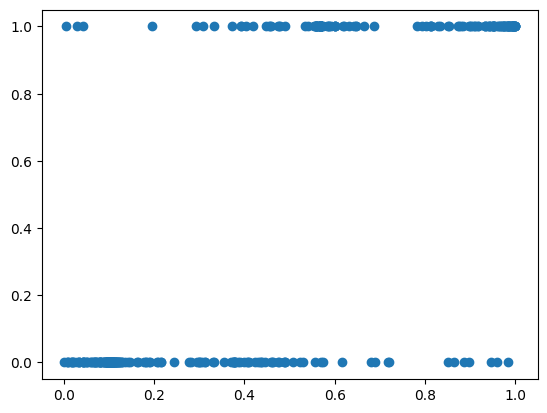

In [364]:
#plotting scatter plot for X_test[Sex]
import matplotlib.pyplot as plt
plt.scatter(nn.predict(X_test),sex_values)
plt.show
#Count Pearson correlation 
import scipy.stats as ss
print(ss.pearsonr(sex_values,list(map(round,nn.predict(X_test)))))

In [365]:
predictions=nn.predict(X_test)

In [319]:
Y_test=np.array(pd.read_csv("gender_submission.csv")[["Survived"]])

In [320]:
Y_test=Y_test.reshape(len(Y_test),)

In [345]:
sub=pd.DataFrame({"PassengerId":pd.read_csv("test.csv")["PassengerId"],"Survived":list(map(round,nn.predict(X_test)))})

KeyError: 0

In [316]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [317]:
sub.to_csv("sub.csv",index=False)

In [ ]:
print(Y_test[891:])

In [ ]:
print(list(sub["Survived"]))

In [ ]:
print(nn)

In [326]:
a=0
p=0
r=0
k_1=0
k_0=0
for i in zip(list(map(round,nn.predict(X_train))),Y_train):
    if i[1]==1:
        k_1+=1
    if i[1]==0:
        k_0+=1
    if i[0]==i[1]:
        a+=1
    if i[0]==i[1]==1:
        p+=1
    if i[0]==i[1]==0:
        r+=1
metrics=[a/len(Y_train),p/k_1,r/k_0]
accuracy,precision,recall=metrics
print("accuracy is {0}, precision is {1},recall is {2}".format(accuracy,precision,recall))

accuracy is 0.8821548821548821, precision is 0.8128654970760234,recall is 0.9253187613843351


In [ ]:
def predict(X,weights,arch): 
    print(arch)
    predictions=[]
    for t in range(len(X)):
    #forward propagation
        a=[]
        z=[]
        for i in range(len(arch)):
            if i==0:
                a.append(X[t].reshape(1,arch[0]))
            else:
                z.append(np.matmul(a[i-1],weights[i-1].transpose()))
                a.append(sig(z[i-1]))
        predictions.append(a[len(arch)-1])
    return predictions       

In [ ]:
pred=np.array(predict(X,weights,arch))
pred=pred.reshape(len(pred),)

In [ ]:
print(pred) 

In [ ]:
pred_rounded=list(map(lambda x:1 if x>=0.5 else 0,pred))

In [ ]:
print(Y_train.reshape(714,))

In [ ]:
print(pred_rounded)

In [ ]:
k=0
for i in zip(pred_rounded,Y_train):
    if i[0]==i[1]:
        k+=1
print("accuracy=",k/len(Y_train))